# Logistic Regression

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

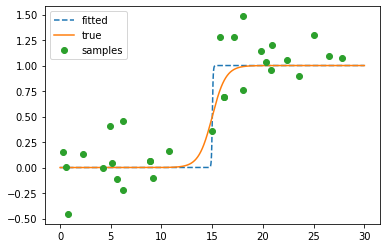

In [4]:
# Example of code, plotting logistic regression curve

from scipy.optimize import curve_fit

def sigmoid(x, k, x0):

    return 1.0 / (1 + np.exp(-k * (x - x0)))

# Parameters of the true function
n_samples = 1000
true_x0 = 15
true_k = 1.5
sigma = 0.2

# Build the true function and add some noise
x = np.linspace(0, 30, num=n_samples)
y = sigmoid(x, k=true_k, x0=true_x0) 
y_with_noise = y + sigma * np.random.randn(n_samples)

# Sample the data from the real function (this will be your data)
some_points = np.random.choice(1000, size=30)  # take 30 data points
xdata = x[some_points]
ydata = y_with_noise[some_points]

# Fit the curve
popt, pcov = curve_fit(sigmoid, xdata, ydata)
estimated_k, estimated_x0 = popt

# Plot the fitted curve
y_fitted = sigmoid(x, k=estimated_k, x0=estimated_x0)

# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_fitted, '--', label='fitted')
ax.plot(x, y, '-', label='true')
ax.plot(xdata, ydata, 'o', label='samples')

ax.legend()

In [5]:
# Regular Course

In [6]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

In [7]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

In [8]:
X=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))


Training set score:0.823
Test set score:0.890


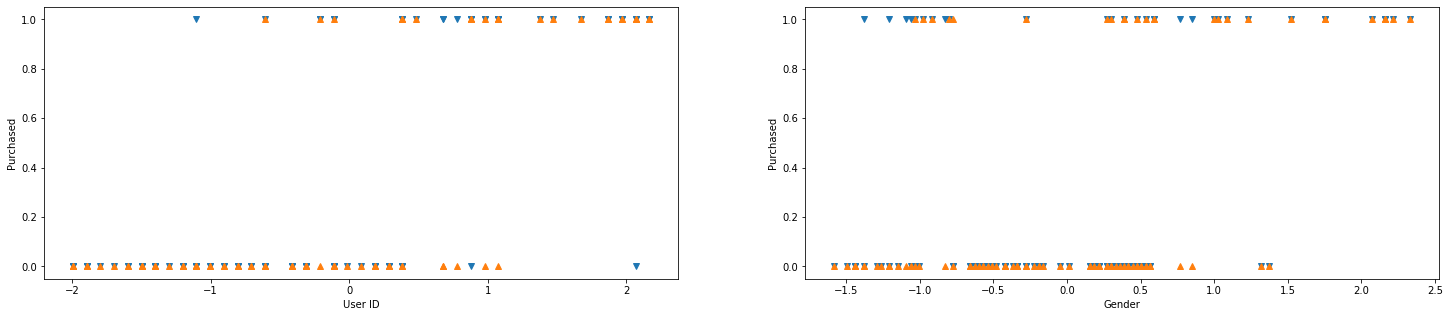

In [11]:
num_X=X.shape[1]

fig, axes= plt.subplots(1,num_X,figsize=(25,5))

for i,ax in zip(range(0,3),axes):
#     ax.plot(X_train[:,i], y_train, 'o')
    ax.plot(X_test[:,i], y_test, 'v')
    ax.plot(X_test[:,i], y_pred, '^')
    ax.set_xlabel(dataset.columns[i])
    ax.set_ylabel(dataset.columns[4])

In [12]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['DATA_P','DATA_F'], index = ['MODEL_P','MODEL_F'])

In [13]:
df_confusion

,DATA_P,DATA_F
MODEL_P,65,3
MODEL_F,8,24


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


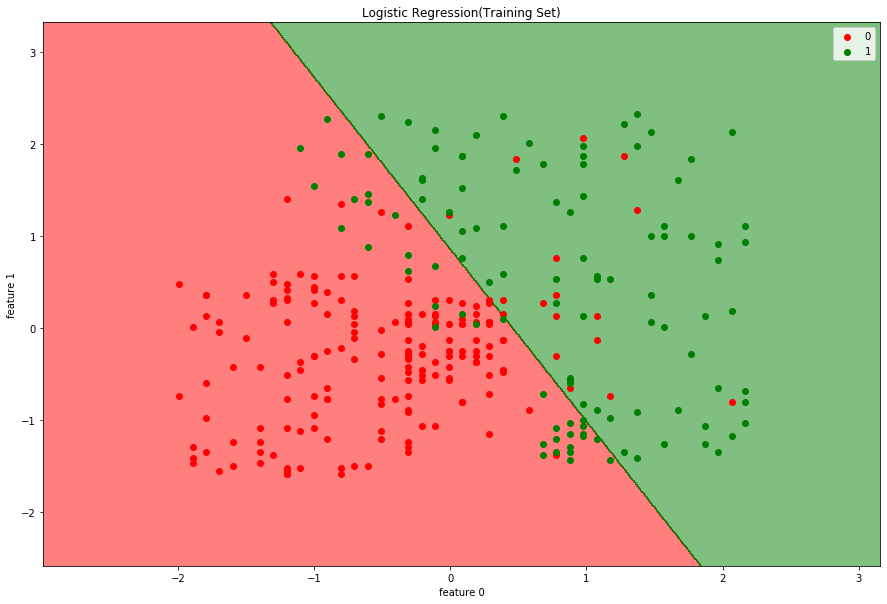

In [14]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


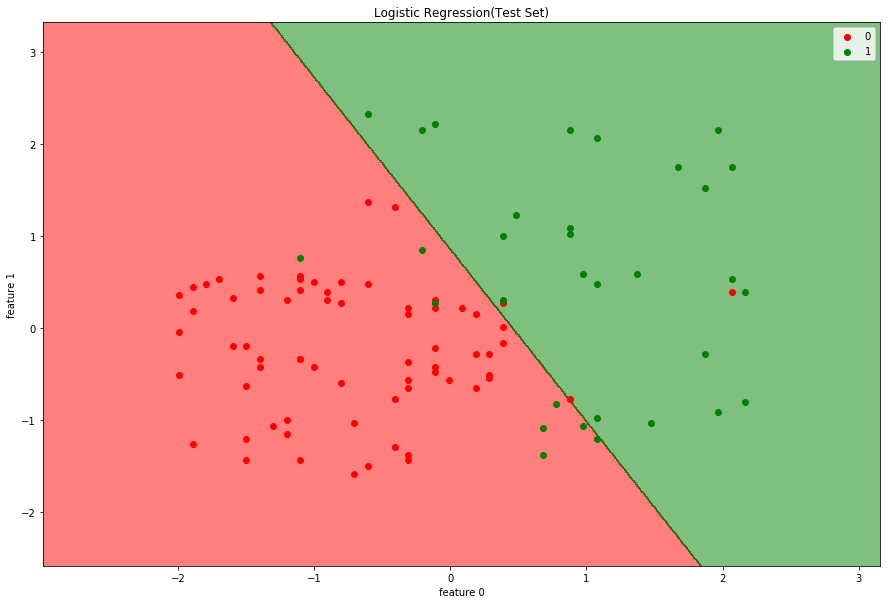

In [15]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


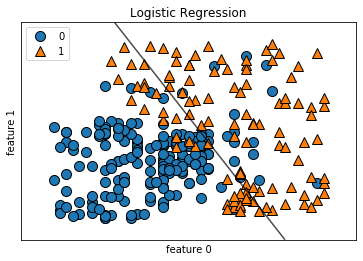

In [16]:
import mglearn

mglearn.plots.plot_2d_separator(classifier, X_train, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.title('Logistic Regression')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

In [20]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2'
                                                                      ], index = ['DATA_1','DATA_2'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)